In [31]:
# Imports
import sys
sys.path.append('../../../utils')

from default_imports import *

In [32]:
# Load data
X_train = pd.read_csv('../data/processed/X_train.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')

# SVM Classification
03_SVM_classification.ipynb

In [33]:
X_train.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_nan,PassengerId,Age,SibSp,Parch,Fare
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,-0.589620,0.431350,-0.474326,-0.500240
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.644848,0.431350,-0.474326,0.788947
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,3.0,-0.281003,-0.475199,-0.474326,-0.486650
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.413385,0.431350,-0.474326,0.422861
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,5.0,0.413385,-0.475199,-0.474326,-0.484133


In [34]:
y_train = y_train.to_numpy().ravel()

y_train[:5]

array([0, 1, 1, 1, 0])

## Cross Validation Tuning

In [60]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

svc = SVC(class_weight='balanced')

grid = GridSearchCV(svc, param_grid, cv=5)
grid.fit(X_train.drop(columns="PassengerId"), y_train)

print(grid.best_params_)

{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}


## Evaluation

In [65]:
from sklearn.model_selection import cross_val_score

svc = SVC(C=100, gamma='auto', kernel='rbf', class_weight='balanced')

scores = cross_val_score(svc, X_train.drop(columns="PassengerId"), y_train, cv=5)

print("Cross-validation scores:")
print(f"Fold scores: {scores}")
print(f"Average score: {np.mean(scores):.4f}")
print(f"Standard deviation: {np.std(scores):.4f}")

Cross-validation scores:
Fold scores: [0.79213483 0.7752809  0.8258427  0.80337079 0.86440678]
Average score: 0.8122
Standard deviation: 0.0308


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       549
           1       0.82      0.83      0.82       340

    accuracy                           0.86       889
   macro avg       0.86      0.86      0.86       889
weighted avg       0.86      0.86      0.86       889



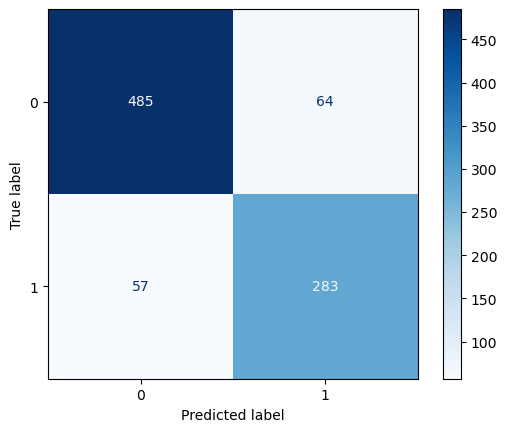

In [92]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

svc = SVC(C=100, gamma='auto', kernel='rbf', class_weight='balanced')
svc.fit(X_train.drop(columns="PassengerId"), y_train)

y_pred = svc.predict(X_train.drop(columns="PassengerId"))

cm = confusion_matrix(y_train, y_pred, labels=svc.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot(cmap='Blues', values_format='d')

report = classification_report(y_train, y_pred)
print("Classification Report:")
print(report)

## Prediction

In [109]:
svc = SVC(C=100, gamma='auto', kernel='rbf', class_weight='balanced')
svc.fit(X_train.drop(columns="PassengerId"), y_train)

y_pred = svc.predict(X_test.drop(columns="PassengerId"))

result = pd.DataFrame({
    'PassengerId': X_test["PassengerId"].astype(int),
    'Survived': y_pred
})

result.to_csv('../output/SVM_classification.csv', index=False)

display(result)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
